In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import os
#import hdbscan
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load in Dataset Of Random Species

In [2]:
def  genereate_df_from_embeddings(file_path, species):
    size = 0
    data = np.matrix(np.arange(424))
    entries = os.scandir(file_path)#'./output/Caryothraustes')
    for entry in entries:
        try:
            if (entry.is_file()):
                path = entry.path
                f = open(path, "r", encoding="cp1252", errors='ignore')
                embedding = f.read().strip().split("\n")
                name = entry.name
                for em in embedding:
                    em = em.strip().split(",")
                    em_times = em.pop(0).split("\t")
                    em.insert(0, em_times[2])
                    em.insert(0, em_times[1])
                    em.insert(0, em_times[0])
                    em = [float(i) for i in em]
                    
                    em.insert(0, species)
                    em.insert(0, name.split(".")[0])

                    #if (data == None):
                    #    data = np.matrix(np.arange(len(em)))
                    #    size = len(em)
                    data = np.append(data, [em],axis=0)
        except Exception as e:
            print("issue with ", entry.name, e)
    data = np.delete(data, 0, 0)
    return pd.DataFrame(data = data, columns=np.append(["name", "species", "start", "end"], np.arange(420)))

Caryothraustes = genereate_df_from_embeddings('./output/Caryothraustes', "Caryothraustes canadensis")

In [3]:
file_paths = ['./output/Caryothraustes', './output/Lipaugus', './output/Anthus crenatus','./output/Hirundo aethiopica', './output/Mulleripicus pulverulentus']
species = ["Caryothraustes canadensis",  "Lipaugus vociferans", "Anthus crenatus", "Hirundo aethiopica", "Mulleripicus pulverulentus"]
df_list = []

for i in range(0, len(species)):
    df = genereate_df_from_embeddings(file_paths[i], species[i])
    df_list.append(df)
df_list
embeddings_df = pd.concat(df_list)

In [4]:
for i in range(420):
    embeddings_df[str(i)] = pd.to_numeric(embeddings_df[str(i)])

In [5]:
def get_species_label(animal):
    return species.index(animal)

In [6]:
cluster_data = embeddings_df.get( map(str, np.append(range(0,420), "species"))).assign(species=embeddings_df.get("species").apply(get_species_label))

In [7]:
cluster_data

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
0,0.967806,0.769643,0.756692,0.527631,0.675048,0.600976,1.111168,1.413313,1.330342,0.756468,...,0.893902,0.171246,1.233183,0.583374,1.769806,1.383978,2.475166,1.078415,0.925694,0
1,1.037510,0.367679,0.888994,0.587892,1.099438,0.726024,1.458717,1.604337,0.958347,0.803813,...,0.813141,0.123987,0.694158,1.475667,1.093555,1.371023,2.103386,0.547020,0.743710,0
2,1.140484,0.451682,1.018024,0.501134,1.125137,1.123260,0.956831,1.808194,1.110360,0.663836,...,0.780600,0.022648,0.569220,1.441502,1.194814,1.776055,2.202230,0.326116,0.829030,0
3,0.528979,0.408542,0.387037,0.575231,0.896221,1.027779,1.528906,2.008421,1.317093,1.067263,...,0.632454,0.058461,0.723708,0.815625,1.495955,1.268945,2.037256,0.679940,0.429032,0
4,0.479268,0.233081,1.467099,0.380584,1.149037,0.581240,1.472090,1.880152,1.015008,0.737940,...,0.542426,0.275469,0.508092,0.847231,1.553738,1.313461,1.432835,0.665235,0.736251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,1.381676,0.468748,0.663441,0.501041,1.129288,0.981877,1.070357,0.591372,0.866726,1.032526,...,1.039565,0.672447,0.091795,1.663368,0.482087,1.012864,0.687840,0.481954,0.436725,4
281,0.841789,1.048085,0.450634,0.353154,1.427484,0.992976,0.483312,0.664289,0.924245,0.610640,...,0.548517,0.810128,0.443655,0.996459,0.613397,1.100424,0.932739,0.757559,0.313792,4
282,0.868418,0.613148,0.628652,0.386812,1.286935,1.005625,0.481344,0.611417,0.761647,0.644113,...,0.801083,0.798538,0.097524,0.875056,0.613701,0.771167,1.038458,0.415038,0.400380,4
283,0.832369,0.364247,0.674693,0.219149,0.939530,0.619524,0.467966,0.507843,0.527369,0.593541,...,0.561237,0.454302,0.245876,0.888644,0.296072,0.886418,0.563096,0.449758,0.320249,4


# Do centeroid distance predictions

In [8]:
import scipy

In [9]:
def compute_centeroid(df, cluster):
    df = df[df.get("species") == cluster].drop(columns=["species"])
    return df.sum(axis=0)/df.shape[0]

Split Data

In [10]:
cleaned_cluster_data = cluster_data.reset_index().drop(columns=["index"])
test = cleaned_cluster_data.sample(int(cleaned_cluster_data.shape[0] * 0.1)).sort_index(axis = 0)
test

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
1,1.037510,0.367679,0.888994,0.587892,1.099438,0.726024,1.458717,1.604337,0.958347,0.803813,...,0.813141,0.123987,0.694158,1.475667,1.093555,1.371023,2.103386,0.547020,0.743710,0
14,0.481660,1.015392,0.723321,0.468513,0.414223,0.524105,0.491322,0.652823,0.429470,0.414752,...,0.538845,0.409108,0.964646,0.872084,0.329489,1.113298,0.646370,0.024339,0.414458,0
26,0.283011,0.591216,0.005255,1.420715,1.052693,0.364391,0.772616,1.143785,0.946400,0.511790,...,0.697739,0.823645,1.049146,1.161908,1.890958,1.391890,0.691129,0.363409,0.684419,0
27,0.546794,0.578210,0.372580,0.781606,0.179034,0.276738,0.408805,0.383020,0.532129,0.376171,...,0.523934,0.592871,0.324270,0.506561,0.569766,0.621015,0.213489,0.316788,0.365685,0
28,0.976562,0.447887,0.017570,0.381620,0.427897,0.861756,0.710053,0.324730,0.937869,0.388806,...,1.032431,0.298273,0.025887,0.694785,0.494822,0.884749,0.592149,0.319965,0.894580,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7357,0.409224,1.938425,0.458071,0.854357,0.248426,0.804273,1.014326,0.692666,0.801679,1.198513,...,0.152717,0.968237,0.363475,1.094086,0.208558,0.891094,1.152351,0.971519,0.407890,4
7386,1.068409,1.204055,1.021014,0.710556,0.690725,0.255034,0.811777,0.912162,0.567382,1.193331,...,0.771209,1.614306,0.229088,1.136087,0.542190,0.532446,0.439439,1.641817,0.648918,4
7402,0.463799,0.529307,0.548418,0.310521,0.062029,0.247830,0.847957,0.202378,0.302099,0.515223,...,0.339234,0.727852,0.321324,1.225677,0.286000,1.037309,0.504658,0.526782,0.602876,4
7414,0.295072,0.858872,0.544089,0.860562,0.612339,0.563337,1.116875,0.575543,0.754448,1.361214,...,0.114765,0.804895,0.466546,1.555927,0.087327,1.200988,1.520750,1.512284,0.793998,4


In [11]:
train = cleaned_cluster_data[~cleaned_cluster_data.index.isin(test.index)].sort_index(axis = 0)
train

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
0,0.967806,0.769643,0.756692,0.527631,0.675048,0.600976,1.111168,1.413313,1.330342,0.756468,...,0.893902,0.171246,1.233183,0.583374,1.769806,1.383978,2.475166,1.078415,0.925694,0
2,1.140484,0.451682,1.018024,0.501134,1.125137,1.123260,0.956831,1.808194,1.110360,0.663836,...,0.780600,0.022648,0.569220,1.441502,1.194814,1.776055,2.202230,0.326116,0.829030,0
3,0.528979,0.408542,0.387037,0.575231,0.896221,1.027779,1.528906,2.008421,1.317093,1.067263,...,0.632454,0.058461,0.723708,0.815625,1.495955,1.268945,2.037256,0.679940,0.429032,0
4,0.479268,0.233081,1.467099,0.380584,1.149037,0.581240,1.472090,1.880152,1.015008,0.737940,...,0.542426,0.275469,0.508092,0.847231,1.553738,1.313461,1.432835,0.665235,0.736251,0
5,0.556996,1.048566,0.242281,0.658880,1.097543,1.128642,0.471925,1.409862,0.499686,1.011936,...,0.430917,0.132071,0.852464,0.291321,2.252734,1.546174,2.445083,1.224913,0.311717,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7431,1.381676,0.468748,0.663441,0.501041,1.129288,0.981877,1.070357,0.591372,0.866726,1.032526,...,1.039565,0.672447,0.091795,1.663368,0.482087,1.012864,0.687840,0.481954,0.436725,4
7432,0.841789,1.048085,0.450634,0.353154,1.427484,0.992976,0.483312,0.664289,0.924245,0.610640,...,0.548517,0.810128,0.443655,0.996459,0.613397,1.100424,0.932739,0.757559,0.313792,4
7433,0.868418,0.613148,0.628652,0.386812,1.286935,1.005625,0.481344,0.611417,0.761647,0.644113,...,0.801083,0.798538,0.097524,0.875056,0.613701,0.771167,1.038458,0.415038,0.400380,4
7434,0.832369,0.364247,0.674693,0.219149,0.939530,0.619524,0.467966,0.507843,0.527369,0.593541,...,0.561237,0.454302,0.245876,0.888644,0.296072,0.886418,0.563096,0.449758,0.320249,4


generate a list of centeroids for each species in training data set

In [12]:
centeroids = []
for cluster in np.unique(cluster_data.get("species")):
    centeroids.append(compute_centeroid(train, cluster).to_numpy())
centeroids = np.stack( centeroids, axis=0 )
centeroids    

array([[0.49350691, 0.65519183, 0.52077795, ..., 0.82820279, 0.53383695,
        0.68175906],
       [0.57068575, 0.44175509, 0.60418215, ..., 1.35024367, 0.62799854,
        0.54467633],
       [0.81216158, 0.64853957, 1.17022899, ..., 0.64048618, 0.75220279,
        0.73951363],
       [0.65578883, 0.58016456, 1.05171098, ..., 0.43943579, 0.80573089,
        0.60886475],
       [0.54543922, 0.95648195, 0.51360148, ..., 0.71976912, 0.69414467,
        0.61391352]])

Based on training centeroids, attempt to predict species labels of testing dataset

In [13]:
#get_dist_train = train.reset_index().drop(columns=["index", "species"])
#dist_matrix_train = scipy.spatial.distance_matrix(get_dist_train.to_numpy(dtype=float),centeroids)

get_dist_test = test.reset_index().drop(columns=["index", "species"])
dist_matrix_test = scipy.spatial.distance_matrix(get_dist_test.to_numpy(dtype=float),centeroids)

In [28]:
len(get_dist_test)

7436

In [29]:
dist_matrix_test

array([[ 9.57504298, 10.85833831, 10.92935715, 11.09031171, 11.12367922],
       [ 8.23077975,  8.64008027,  9.64329918,  9.168136  ,  9.59630817],
       [ 8.70593082, 11.28364022, 11.18436346, 11.48548524, 10.32930467],
       ...,
       [ 8.0710817 ,  8.35005635,  8.83228362,  8.34426014,  5.81060009],
       [ 9.08990871,  9.49197232,  9.92246344, 10.28178185,  6.81288108],
       [10.09370639, 10.38479417, 10.86819834, 11.47155682,  7.39532839]])

,0,1,2,3,4
0,9.575043,10.858338,10.929357,11.090312,11.123679
1,8.230780,8.640080,9.643299,9.168136,9.596308
2,8.705931,11.283640,11.184363,11.485485,10.329305
3,8.276130,7.675182,9.037833,7.616690,8.440266
4,8.306228,8.473592,9.312530,8.540825,8.646098
...,...,...,...,...,...
738,10.545974,11.505766,11.328938,12.037174,7.983015
739,9.519936,10.254806,10.764390,10.902397,7.926469
740,8.071082,8.350056,8.832284,8.344260,5.810600
741,9.089909,9.491972,9.922463,10.281782,6.812881


In [15]:
def create_species_predictions(dist_matrix):
    species_predicted = np.array([])
    for i in range(len(dist_matrix)):
        species_predicted = np.append(species_predicted, np.where(dist_matrix[i] == min(dist_matrix[i])))
    return species_predicted

species_predicted = create_species_predictions(dist_matrix_test)
species_predicted

array([0., 0., 0., 3., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 3., 3.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 3., 3., 3., 1., 1., 3.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [16]:
len(species_predicted)

743

Assign these predicted species to test dataset

In [17]:
centeroid_work = test.assign(species_predicted=species_predicted).get(["species", "species_predicted"])
centeroid_work

,species,species_predicted
1,0,0.0
14,0,0.0
26,0,0.0
27,0,3.0
28,0,0.0
...,...,...
7357,4,4.0
7386,4,4.0
7402,4,4.0
7414,4,4.0


In [18]:
false_positives = centeroid_work[centeroid_work.species != centeroid_work.species_predicted]
false_positives

,species,species_predicted
27,0,3.0
33,0,3.0
222,0,1.0
243,0,1.0
298,0,1.0
...,...,...
6720,3,2.0
7220,4,3.0
7223,4,3.0
7258,4,3.0


Proportions of incorrectly labeled data

In [19]:
false_positives.shape[0]/centeroid_work.shape[0]

0.1278600269179004

====================================================

In [20]:
centeroids = []
for cluster in np.unique(cluster_data.get("species")):
    centeroids.append(compute_centeroid(cleaned_cluster_data, cluster).to_numpy())
centeroids = np.stack( centeroids, axis=0 )
get_dist_test = cluster_data.drop(columns=["species"])
dist_matrix_all = scipy.spatial.distance_matrix(get_dist_test.to_numpy(dtype=float),centeroids)
species_predicted = create_species_predictions(dist_matrix_all)
species_predicted

array([0., 0., 0., ..., 4., 4., 4.])

# Visualizations

In [21]:
pca = PCA(n_components = 3) # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(embeddings_df.get( map(str, range(0,420))))

pd.DataFrame(pca.components_.T)
X_train_pc
pca_embeddings = pd.DataFrame(data={"cluster": species_predicted, "species": list(embeddings_df.get("species").apply(get_species_label))})
pca_embeddings = pd.concat([pca_embeddings, pd.DataFrame(X_train_pc)], axis=1)
pca_embeddings.columns = ["species_predicted", "species", "x", "y", "z"]
#pca_embeddings = pca_embeddings.assign(species=embeddings_df.get("species"))
pca_embeddings

,species_predicted,species,x,y,z
0,0.0,0,2.919044,-0.199620,3.432001
1,0.0,0,2.832059,0.597257,3.707431
2,0.0,0,4.466963,0.010910,4.189710
3,0.0,0,2.231342,-0.303444,3.320025
4,0.0,0,2.430436,-0.125230,2.824764
...,...,...,...,...,...
7431,4.0,4,1.836399,1.619820,2.354246
7432,4.0,4,1.661936,0.337690,3.517932
7433,4.0,4,0.581084,1.310063,2.584446
7434,4.0,4,-3.126807,1.663887,1.818696


## Species Predicted In Test Sample

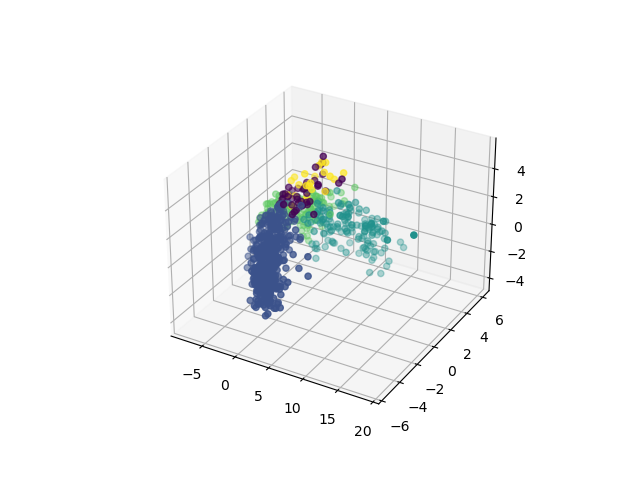

In [22]:
#cleaned_cluster_data[~cleaned_cluster_data.index.isin(test.index)].sort_index(axis = 0)
embeddings_to_plot = pca_embeddings[pca_embeddings.index.isin(test.index)].sort_index(axis = 0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
plot;

## Actual Species In Test Sample

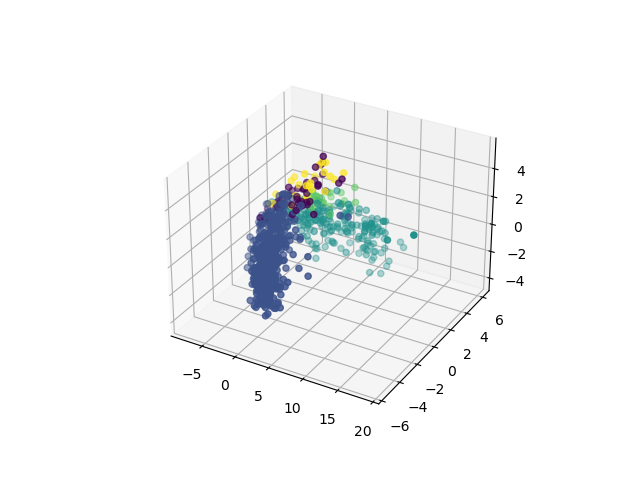

In [23]:
embeddings_to_plot = pca_embeddings[pca_embeddings.index.isin(test.index)].sort_index(axis = 0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species"))
plot;

## Species Predicted != Species Labels in Test Sample

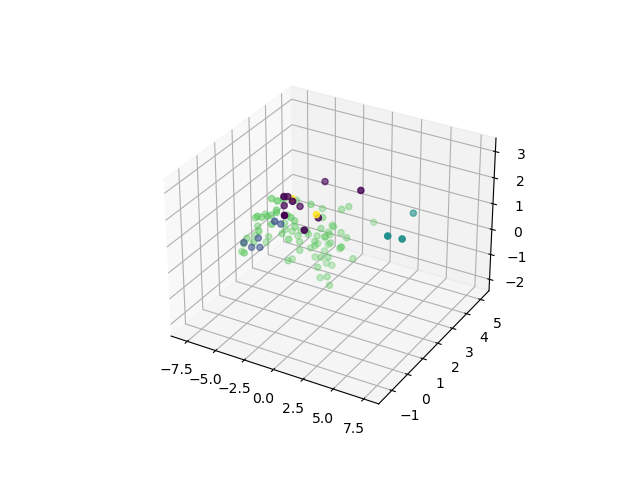

In [24]:
embeddings_to_plot = pca_embeddings[(pca_embeddings.index.isin(test.index)) & (pca_embeddings.species != pca_embeddings.species_predicted)]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
plot;

## Species Predicted == Species Labels

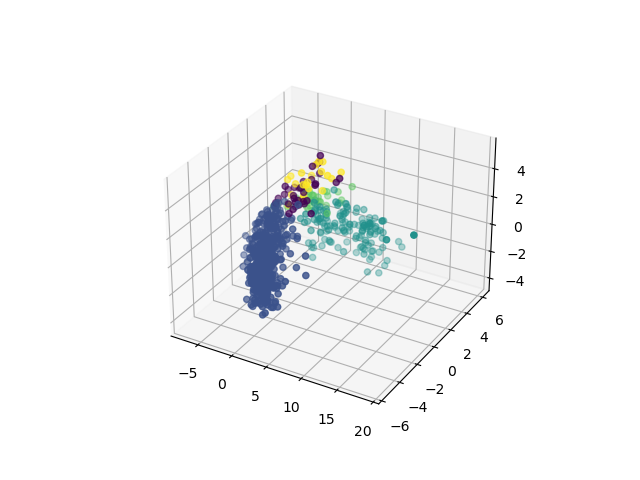

In [25]:
embeddings_to_plot = pca_embeddings[(pca_embeddings.index.isin(test.index)) & (pca_embeddings.species == pca_embeddings.species_predicted)]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
plot;

All Data Again


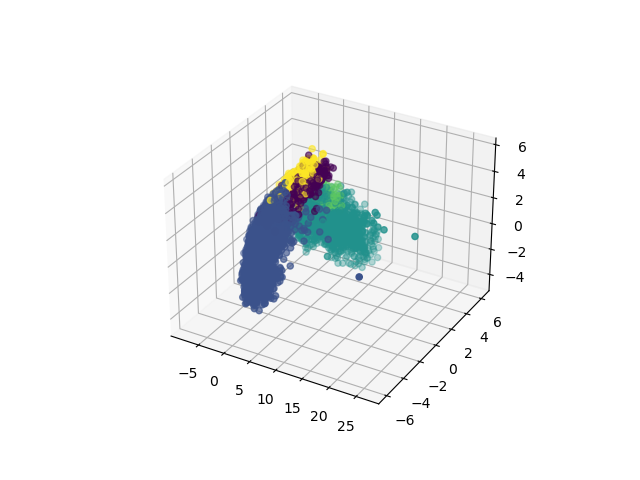

In [26]:
embeddings_to_plot = pca_embeddings
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species"))
plot;

# Conclusion?

- Promsing sign we can use simple centorids to expand birdnet's ablity without needing to retrain birdnet
- When birds cluster together, it may confuse this algorithm